

# **Projeto Final** - Pâmella Vitória Gomes Farias



## 🕵️‍♀️**Regressão**

##⚙️ **Coleta de dados**

In [285]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [286]:
df = sns.load_dataset("geyser")

*Dataset disponivel em:* https://github.com/mwaskom/seaborn-data/blob/master/geyser.csv

##⚙️ **Analisando o df**

###Read

*Visualizando apenas as 5 primeiras linhas do Dataframe*

In [287]:
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


*Informações sobre o Dataset*

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


*Descrição do Dataset*

In [289]:
df.describe()

,duration,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


*Dimensão do dataset*

In [290]:
df.shape

(272, 3)

*Descrição dos índices e colunas*

In [291]:
display(df.index)

display(df.columns)

RangeIndex(start=0, stop=272, step=1)

Index(['duration', 'waiting', 'kind'], dtype='object')

*Resumo dos Dados*

In [292]:
print('Soma dos valores do DataFrame',df.sum(),'\n')
print('#Menor valor do DataFrame',df.min(),'\n')
print('#Maior valor',df.max(),'\n')
print('#Média dos valores',df.mean(),'\n')
print('Mediana dos valores',df.median(),'\n')

Soma dos valores do DataFrame duration                                              948.677
waiting                                                 19284
kind        longshortlongshortlongshortlonglongshortlongsh...
dtype: object 

#Menor valor do DataFrame duration     1.6
waiting       43
kind        long
dtype: object 

#Maior valor duration      5.1
waiting        96
kind        short
dtype: object 

#Média dos valores duration     3.487783
waiting     70.897059
dtype: float64 

Mediana dos valores duration     4.0
waiting     76.0
dtype: float64 



<ipython-input-292-b935af0efd19>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('#Média dos valores',df.mean(),'\n')
<ipython-input-292-b935af0efd19>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Mediana dos valores',df.median(),'\n')


*Verificando a existência de valores nulos*

In [293]:
df.isnull().sum()

duration    0
waiting     0
kind        0
dtype: int64

In [294]:
#Visualizar os tipos de dados
df.dtypes


duration    float64
waiting       int64
kind         object
dtype: object

In [295]:
df_clean = df.copy()

In [296]:
label_encoder = preprocessing.LabelEncoder()
df_clean['kind']= label_encoder.fit_transform(df_clean['kind'])


In [297]:
df_clean['duration'] = MinMaxScaler().fit_transform(np.array(df_clean['duration']).reshape(-1,1))
df_clean['waiting'] = MinMaxScaler().fit_transform(np.array(df_clean['waiting']).reshape(-1,1))

In [298]:
y = df_clean["kind"]
X = df_clean[['duration',	'waiting']]

x2 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

In [299]:
X

,0,1
0,0.571429,0.679245
1,0.057143,0.207547
2,0.495143,0.584906
3,0.195143,0.358491
4,0.838000,0.792453
...,...,...
267,0.719143,0.716981
268,0.157143,0.056604
269,0.804857,0.886792
270,0.062000,0.056604


In [300]:
y

0      0
1      1
2      0
3      1
4      0
      ..
267    0
268    1
269    0
270    1
271    0
Name: kind, Length: 272, dtype: int64

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste


*Árvores de decisão*

In [302]:
# Primeira Árvore de Decisão para regressão com parâmetros padrões
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

result1 = model1.predict(X_test)
acc1 = metrics.accuracy_score(result1, y_test)
show1 = round(acc1 * 100)
print("{}%".format(show1))

model2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
model2.fit(X_train, y_train)

result2 = model2.predict(X_test)
acc2 = metrics.accuracy_score(result2, y_test)
show2 = round(acc2 * 100)
print("{}%".format(show2))


100%
100%


*KNN*

In [320]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

result3 = model3.predict(X_test)
acc3 = metrics.accuracy_score(result3, y_test)
show3 = round(acc3 * 100)
print("{}%".format(show3))

model4 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
model4.fit(X_train, y_train)

result4 = model4.predict(X_test)
acc4 = metrics.accuracy_score(result4, y_test)
show4 = round(acc4 * 100)
print("{}%".format(show4))


98%
98%


*MLP*

In [304]:
model5 = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model5.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model5.predict(X_test)

# Avaliar o desempenho do modelo
mse = metrics.mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Se quiser visualizar as previsões em comparação com os verdadeiros valores
comparison_df = pd.DataFrame({'True Values': y_test, 'Predictions': predictions})
print(comparison_df)

model6 = MLPRegressor(hidden_layer_sizes=(200, 100), learning_rate_init=0.01, max_iter=1000, random_state=42)
model6.fit(X_train, y_train)

predictions6 = model6.predict(X_test)
mse6 = metrics.mean_squared_error(y_test, predictions6)
print("Mean Squared Error (Model6):", mse6)


Mean Squared Error: 0.02084226945240822
     True Values  Predictions
256            0     0.172539
240            0     0.085674
110            0     0.005715
264            1     1.048444
52             1     1.024481
131            0     0.020295
190            0    -0.050198
219            0     0.077842
18             1     1.065081
7              0     0.101272
254            0    -0.015353
68             1     0.867519
61             0    -0.032496
46             1     0.301976
44             0     0.048211
138            1     1.002374
181            0     0.009632
38             1     0.993413
215            0     0.064581
232            0    -0.004767
236            1     1.022317
186            0     0.025937
145            1     0.970097
49             1     0.967172
174            0     0.035958
35             1     1.009280
258            1     0.989387
211            0    -0.029054
260            0    -0.022669
157            0    -0.041108
151            0     0.094069


*SVM*

In [305]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

model7 = SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0,
             shrinking=True, probability=False, tol=0.001, cache_size=200,
             class_weight=None, verbose=False, max_iter=-1, random_state=None)

model7.fit(X_train, y_train)

result7 = model7.predict(X_test)
acc7 = metrics.accuracy_score(result7, y_test)
show7 = round(acc7 * 100)
print("{}%".format(show7))

model8 = SVC(C=10, kernel='rbf', gamma=0.1, random_state=42)
model8.fit(X_train, y_train)


result8 = model8.predict(X_test)

# Avaliar o desempenho do modelo
acc8 = metrics.accuracy_score(result8, y_test)
show8 = round(acc8 * 100)
print("{}%".format(show8))

64%
96%


*Random Forest*

In [306]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

resultRF = modelRF.predict(X_test)

accRF = metrics.accuracy_score(resultRF, y_test)

showRF = round(accRF * 100)
print("RandomForest: {}%".format(showRF))

RandomForest: 100%


*GradientBoosting*

In [307]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y_train)

resultGB = modelGB.predict(X_test)

accGB = metrics.accuracy_score(resultGB, y_test)

showGB = round(accGB * 100)
print("GradientBoosting: {}%".format(showGB))

GradientBoosting: 100%


In [308]:
mse_dt_list, rmse_dt_list, mae_dt_list = [], [], []

for i in range(10):
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo DecisionTreeClassifier
    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train, y_train)
    result_dt = model_dt.predict(X_test)
    acc_dt = metrics.accuracy_score(result_dt, y_test)
    print(f"DecisionTreeClassifier - Iteração {i+1}: Accuracy = {round(acc_dt*100)}%")
    mse_dt_list.append(acc_dt)


DecisionTreeClassifier - Iteração 1: Accuracy = 98%
DecisionTreeClassifier - Iteração 2: Accuracy = 100%
DecisionTreeClassifier - Iteração 3: Accuracy = 100%
DecisionTreeClassifier - Iteração 4: Accuracy = 100%
DecisionTreeClassifier - Iteração 5: Accuracy = 100%
DecisionTreeClassifier - Iteração 6: Accuracy = 100%
DecisionTreeClassifier - Iteração 7: Accuracy = 100%
DecisionTreeClassifier - Iteração 8: Accuracy = 100%
DecisionTreeClassifier - Iteração 9: Accuracy = 100%
DecisionTreeClassifier - Iteração 10: Accuracy = 100%


In [309]:
avg_mse_dt = np.mean(mse_dt_list)
print(f"Média dos MSE para DecisionTreeClassifier: {(avg_mse_dt*100)}%")

Média dos MSE para DecisionTreeClassifier: 99.81818181818183%


##⚙️ **Gráficos**

*Gráfico de dispersão*

In [310]:
df_clean.columns

Index(['duration', 'waiting', 'kind'], dtype='object')

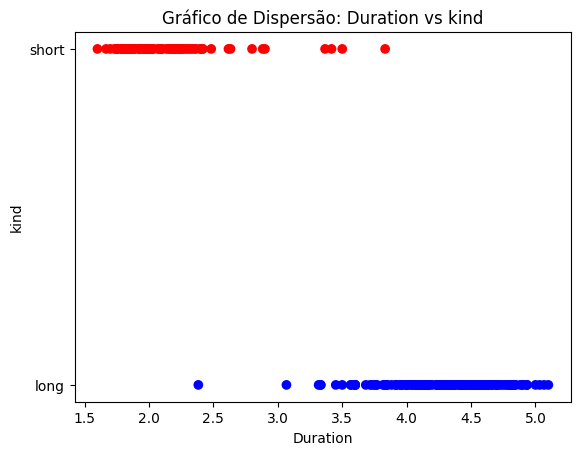

In [311]:
# Mapear as categorias para cores
color_mapping = {'long': 'blue', 'short': 'red'}
df['color'] = df['kind'].map(color_mapping)


plt.scatter(df['duration'], df['kind'], c=df['color'])
plt.title('Gráfico de Dispersão: Duration vs kind')
plt.xlabel('Duration')
plt.ylabel('kind')
plt.show()

*Boxplot*

<Axes: title={'center': 'kind X waiting'}, xlabel='kind', ylabel='waiting'>

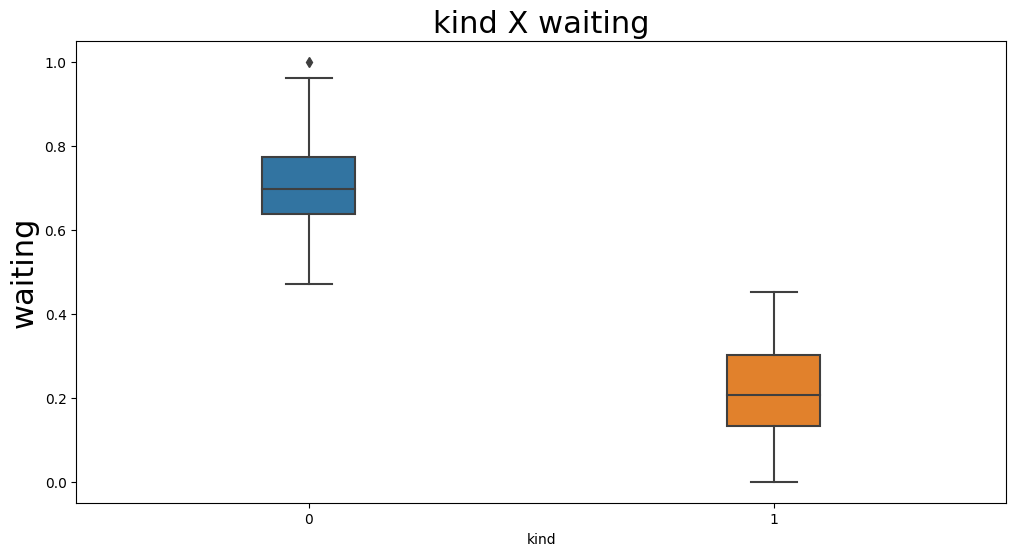

In [312]:
ax = sns.boxplot(y="waiting", x="kind", data=df_clean, orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title("kind X waiting", fontsize = 22)
ax.set_ylabel("waiting", fontsize = 22)
ax